# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load manually downloaded dataset `twitter_archive_enhanced.csv`
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# downloading from udacity archive
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet_json.txt', mode='wb') as file:
    file.write(response.content)

In [144]:
import json

tweet_data = []

with open('tweet_json.txt', encoding='utf-8', mode='r') as file:
    for data in file:
        # convert string dictionary to dictionary
        data = json.loads(data)
        tweet_id = data.get('id_str')
        favorite_count = data.get('favorite_count')
        retweet_count = data.get('retweet_count')
                
        tweet_data.append({'tweet_id': tweet_id,
                           'favorite_count': favorite_count,
                           'retweet_count': retweet_count
                           })
        
df_tweet_data = pd.DataFrame(tweet_data)
df_tweet_data.to_csv('tweets_api_data.csv')
df_tweet_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assess the `df_twitter_archive` DataFrame

In [6]:
df_twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_twitter_archive.query("name == 'None'").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None


In [8]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1948,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,None,None,pupper,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
1374,701952816642965504,NaN,NaN,2016-02-23 02:12:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701952816...,11,10,Rilo,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None
1810,676821958043033607,NaN,NaN,2015-12-15 17:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676821958...,11,10,None,None,None,None,None
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None


In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Toby           7
Buddy          7
Daisy          7
an             7
Bella          6
Scout          6
Oscar          6
Milo           6
Stanley        6
Jax            6
Leo            6
Rusty          6
Jack           6
Dave           6
Koda           6
Chester        5
            ... 
Divine         1
Lilah          1
Vixen          1
Darby          1
Shawwn         1
Dido           1
Bodie          1
Harlso         1
Ester          1
Furzey         1
Ralphy         1
Tassy          1
Randall        1
Lugan          1
Chuq           1
Strudel        1
Lipton         1
Sobe           1
Kanu           1
DayZ           1
Rizzo          1
Petrick        1
Grizzie        1
Derby          1
Snicku         1
Spencer        1
Jazzy          1
Ronnie        

In [12]:
df_twitter_archive.expanded_urls[:7]

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://gofundme.com/ydvmve-surgery-for-jax,ht...
Name: expanded_urls, dtype: object

In [13]:
df_twitter_archive.duplicated().sum()

0

## Assess the `df_image_pred` DataFrame

In [14]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_image_pred.duplicated().sum()

0

In [18]:
df_image_pred.query('p1_dog == False').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False


## Assess the `df_tweet_data` DataFrame

In [19]:
df_tweet_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [20]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [21]:
df_tweet_data.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [22]:
df_tweet_data.duplicated().sum()

0

### Quality issues

**df_twitter_archive**

1. Missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `expanded_urls` and `retweeted_status_timestamp` columns.

2. `tweet_id` is an `integer` instead of an `object`. The variables `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are of the type `float` intead of `object`.

3. There are some `None` values in the `name` variable.

4. The `timestamp` variable is of the *object* datatype instead of *datetime*.

5. Retweeted data is included in the dataset.

6. The values `a`, `an`, `the`, and `just` in the `name` column are not dog names.

7. HTML formatting in the `source` column.


**df_image_pred**

7. `tweet_id` is an integer instead of object.

8. Not all animals in the dataset are dogs. Some are hen, snail, etc

9. Underscores (`_`) in dog breed name. Inconsistent breed names. 

### Tidiness issues
1. In the `df_image_pred` DataFrame, `p1_dog`, `p2_dog`, `p3_dog` contain the same information. They tell us if the object in the image is *a dog*. There should be just one column that tells us the breed of dog in the image based on the confidence score of the neural network in `p1_conf`, `p2_conf`, and `p3_con`.

2. There are four different columns for the *dog's status*: `dodoggo, floofer, pupper, puppo`. 

*Other*

3. The `df_image_pred` and the `df_tweet_data` DataFrame can be merged as one.
4. Multiple URLs in the `expanded_urls` column of the `df_twitter_archive` dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
twitter_archive_clean = df_twitter_archive.copy()
image_pred_clean = df_image_pred.copy()
tweet_data_clean = df_tweet_data.copy()

### Issue #1: Retweeted data is in the dataset.

#### Define:
Retweeted data is included in the dataset. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. If the value in the `retweeted_status_id` is not null, it means that tweet is a retweet. It should be removed from the dataframe.

#### Code

In [24]:
# remove records where retweets are not null
twitter_archive_clean =  twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [25]:
print(twitter_archive_clean.shape)
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].count().sum()

(2175, 17)


0

After removing all records of retweets, the `twitter_archive` data reduced from `2356` to `2175`.

### Issue #2: Missing Values in some columns

#### Define
There are missing values in the following columns`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `expanded_urls` and `retweeted_status_timestamp`. Drop these columns.

#### Code

In [26]:
# drop unnecessary columns
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                'retweeted_status_user_id', 'expanded_urls', 'retweeted_status_timestamp']

twitter_archive_clean.drop(drop_columns, axis=1, inplace=True)

#### Test

In [27]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


### Issue #3: `Tweet_id` is of type integer

#### Define
The `tweet_id` variable is of the type *integer* instead of *object* in both the `df_twitter_archive` and `df_image_pred` DataFrames. Convert these variables to object datatype.

#### Code

In [28]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('object')

#### Test

In [29]:
print(twitter_archive_clean.tweet_id.dtype)
print(image_pred_clean.tweet_id.dtype)

object
object


### Issue #4: The `timestamp` variable is of the *object* datatype instead of *datetime*.

#### Define
Convert the `timestamp` variable in the twitter_archive_clean to datetime object.

#### Code

In [30]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [31]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #5: The values `a`, `an`, `the`, and `just` in the name column are not dog names.

#### Define
Replace the values `a`, `an`, `the`, and `just` in the name column of *df_twitter_archive* with `None`.

#### Code

In [32]:
# use dict.fromkeys to replace multiple values at once
twitter_archive_clean.name = twitter_archive_clean.name.replace(dict.fromkeys(['a', 'an', 'just', 'the'], 'None'))

#### Test

In [33]:
twitter_archive_clean.query('name == "a"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
twitter_archive_clean.query('name == "the"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
twitter_archive_clean.query('name == "just"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: HTML formatting in the `source` column.

#### Define
Remove the HTML formatting in the `source` column of the `df_twitter_archive` DataFrame.

#### Code

In [36]:
twitter_archive_clean.source = twitter_archive_clean.source.apply(lambda x: x.split('>')[1][:-3])

#### Test

In [37]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7: There are four different columns for the *dog's status*: `dodoggo, floofer, pupper, puppo`

#### Define
Some dogs are `doggo-pupper` and some are `doggo-puppo`. Create a new column `dog_status` to show if the dog is `doggo, floofer, pupper, puppo, doggo-pupper or doggo-puppo`

#### Code


In [38]:
def dog_status(df):
    '''df: Pandas DataFrame'''
    if df.doggo != 'None' and df.pupper != 'None':
        return 'doggo-pupper'
    elif df.doggo != 'None' and df.puppo != 'None':
        return 'doggo-puppo'
    elif df.doggo != 'None':
        return 'doggo'        
    elif df.floofer != 'None':
        return 'floofer'
    elif df.pupper != 'None':
        return 'pupper'
    elif df.puppo != 'None':
        return 'puppo'
    else:
        return 'None'
        

twitter_archive_clean['dog_status'] = twitter_archive_clean.apply(dog_status, axis="columns")

#### Test

In [39]:
twitter_archive_clean.query('dog_status == "doggo"').head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,doggo
43,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,None,None,None,doggo
99,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10,None,doggo,None,None,None,doggo
108,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,None,None,None,doggo
110,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,None,None,None,doggo


In [40]:
twitter_archive_clean.query('dog_status == "doggo-pupper"').head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,None,pupper,None,doggo-pupper
531,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,doggo,None,pupper,None,doggo-pupper
565,802265048156610565,2016-11-25 21:37:47,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,doggo,None,pupper,None,doggo-pupper
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another d...,12,10,Bones,doggo,None,pupper,None,doggo-pupper
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,None,pupper,None,doggo-pupper


In [41]:
twitter_archive_clean.query('dog_status == "doggo-puppo"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,None,None,puppo,doggo-puppo


### Issue #8: Drop the `doggo, floofer, pupper,` and `puppo` columns

#### Define
Now that we have the `dog_status` column, we can drop the `doggo, floofer, pupper,` and `puppo` columns.

#### Code

In [42]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [43]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_status
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


### Issue #9: Not all animals in the `df_image_pred` are dogs

#### Define
Remove records of animals that are not dogs. Use `p1_dog`, `p1_conf`, `p2_dog`, `p2_conf`, `p3_dog` and `p3_conf`, to do this.

#### Code

If any of the neural network prediction is `True`, we'll keep that value

In [44]:
def isDog(df):
    '''Function to determine if image is a dog based on the highest
    confidence score of the neural network.
    
    df: Pandas DataFrame'''
    
    if (df.p1_conf > df.p2_conf) and (df.p1_conf > df.p3_conf):
        return df.p1_dog
    elif (df.p2_conf > df.p1_conf) and (df.p2_conf > df.p3_conf):
        return df.p2_dog
    else:
        return df.p3_dog
    
image_pred_clean['is_dog'] = image_pred_clean.apply(isDog, axis="columns")
print("Shape of data before removing non-dog images", image_pred_clean.shape)
image_pred_clean.head()

Shape of data before removing non-dog images (2075, 13)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


In the second example below, the record with index `8` has p1 to be the highest confidence score. The score is `0.962465` and the the prediction is `shopping_cart`. This image is not a dog. In the `is_dog` column, we have `False` to show that it is not a dog.

In [45]:
image_pred_clean.query('is_dog == False').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,False


In [46]:
# Remove all non-dog images
image_pred_clean = image_pred_clean.query('is_dog == True')
print("Shape of data after removing non-dog images", image_pred_clean.shape)

Shape of data after removing non-dog images (1532, 13)


#### Test

In [47]:
len(image_pred_clean.query('is_dog == False'))

0

### Issue #9: Get Dog Breed From Neural Network Prediction

#### Define
There should be just one column that tells us the breed of dog in the image based on the confidence score of the neural network in `p1_conf`, `p2_conf`, and `p3_con`. Create a new column `dog_breed`. It will be based on which column has the highest confidence score out of `p1_conf`, `p2_conf`, and `p3_con`.

#### Code

In [48]:
def breed(df):
    '''Function to extract dog breed based on neural network prediction
    df: Pandas DataFrame'''
    
    if (df.p1_conf > df.p2_conf) and (df.p1_conf > df.p3_conf):
        return df.p1
    elif (df.p2_conf > df.p1_conf) and (df.p2_conf > df.p3_conf):
        return df.p2
    else:
        return df.p3

image_pred_clean['dog_breed'] = image_pred_clean.apply(breed, axis="columns")

#### Test

In [49]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,miniature_pinscher


### Issue #10: Remove Unnecessary column in the`image_pred_clean` DataFrame.

#### Define
We now have the `dog_breed` column. We can remove the columns `p1_conf`, `p2_conf`, `p3_conf`, `p1`, `p2`, `p3`, `is_dog`.

#### Code

In [50]:
drop_cols = ['p1_conf', 'p2_conf', 'p3_conf', 'p1', 'p2', 'p3', 'is_dog', 'p1_dog', 'p2_dog', 'p3_dog']
image_pred_clean.drop(drop_cols, axis=1, inplace=True)

#### Test

In [51]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Issue #11: Fix inconsistencies in the `dog_breed` column.

#### Define
Replace the underscores with space, and make all the everything lowercase.

#### Code

In [52]:
image_pred_clean.dog_breed = image_pred_clean.dog_breed.str.replace("_", " ").str.lower()

#### Test

In [53]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
# Reset index
twitter_archive_clean.reset_index(drop=True, inplace=True)
image_pred_clean.reset_index(drop=True, inplace=True)
tweet_data_clean.reset_index(drop=True, inplace=True)

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_status
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


## Minor Issue 

### I can't merge the columns based on tweet_id because thetwitter_archive_clean.tweet_id has no quote around it. Convert it to object to add the quotes. Then convert to object


In [79]:
twitter_archive_clean.tweet_id.values

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149], dtype=object)

In [84]:
image_pred_clean.tweet_id.values

array([666020888022790149, 666029285002620928, 666033412701032449, ...,
       891327558926688256, 891815181378084864, 892177421306343426], dtype=object)

In [85]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.values.astype('str').astype('object')
image_pred_clean.tweet_id = image_pred_clean.tweet_id.values.astype('str').astype('object')

# test
print(twitter_archive_clean.tweet_id.values)
print(image_pred_clean.tweet_id.values)

['892420643555336193' '892177421306343426' '891815181378084864' ...,
 '666033412701032449' '666029285002620928' '666020888022790149']
['666020888022790149' '666029285002620928' '666033412701032449' ...,
 '891327558926688256' '891815181378084864' '892177421306343426']


### Merge all the DataFrames

In [87]:
# merge the DataFrames based on the tweet_id
df_merge = pd.merge(pd.merge(twitter_archive_clean, tweet_data_clean, on='tweet_id'), image_pred_clean, on='tweet_id')
print(df_merge.shape)
df_merge.head()

(1477, 13)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_status,favorite_count,retweet_count,jpg_url,img_num,dog_breed
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller


In [91]:
df_merge.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

- Source of most tweets
- Popular dog names
- Popular dog status
- highest numerator
- popular dog breed

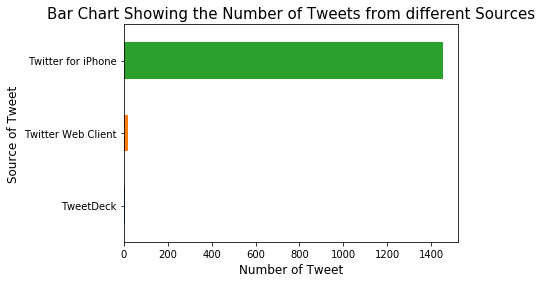

In [102]:
df_merge.source.value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of Tweet', fontsize=12)
plt.ylabel('Source of Tweet', fontsize=12)
plt.title('Bar Chart Showing the Number of Tweets from different Sources', fontsize=15);

In [145]:
df_merge.source.value_counts().sort_values()

TweetDeck                7
Twitter Web Client      19
Twitter for iPhone    1451
Name: source, dtype: int64

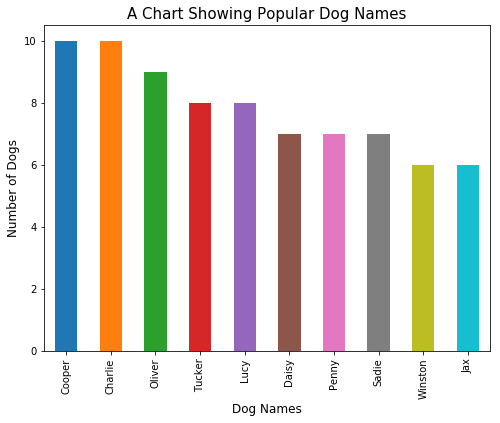

In [147]:
# popular dog names
# filter DataFrame to remove 'None' dog names
df_name = df_merge.query('name != "None"')
df_name.name.value_counts()[:10].plot(kind='bar', figsize=(8,6))
plt.xlabel('Dog Names', fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.title('A Chart Showing Popular Dog Names', fontsize=15);

In [111]:
df_name.name.value_counts()[:10].index

Index(['Cooper', 'Charlie', 'Oliver', 'Tucker', 'Lucy', 'Daisy', 'Penny',
       'Sadie', 'Winston', 'Jax'],
      dtype='object')

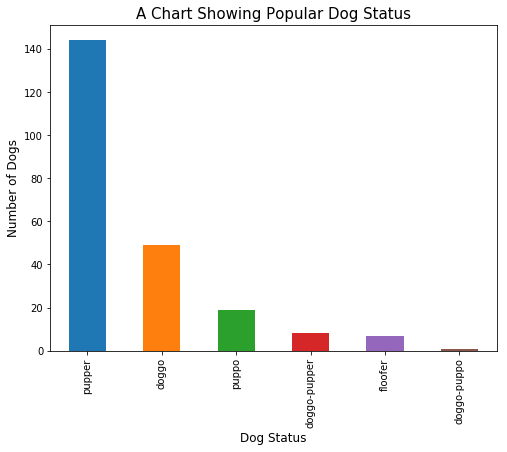

In [148]:
# popular dog status
# filter DataFrame to remove 'None' dog status
df_status = df_merge.query('dog_status != "None"')
df_status.dog_status.value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Dog Status', fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.title('A Chart Showing Popular Dog Status', fontsize=15);

In [149]:
df_status.dog_status.value_counts()

pupper          144
doggo            49
puppo            19
doggo-pupper      8
floofer           7
doggo-puppo       1
Name: dog_status, dtype: int64

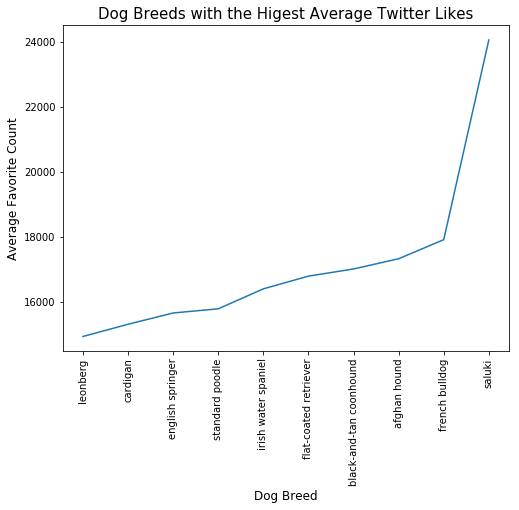

In [150]:
# dog breed with the highest mean favorite count
df_fav_breed = df_merge.groupby('dog_breed').mean()['favorite_count'].sort_values()
df_fav_breed[-10:].plot(kind='line', figsize=(8,6))
plt.xticks(np.arange(10), df_fav_breed[-10:].index, rotation=90)
plt.ylabel('Average Favorite Count', fontsize=12)
plt.xlabel('Dog Breed', fontsize=12)
plt.title('Dog Breeds with the Higest Average Twitter Likes', fontsize=15);

In [153]:
df_fav_breed[-10:][::-1]

dog_breed
saluki                     24060.000000
french bulldog             17913.000000
afghan hound               17326.666667
black-and-tan coonhound    17012.000000
flat-coated retriever      16791.625000
irish water spaniel        16400.000000
standard poodle            15786.000000
english springer           15657.222222
cardigan                   15311.000000
leonberg                   14934.333333
Name: favorite_count, dtype: float64

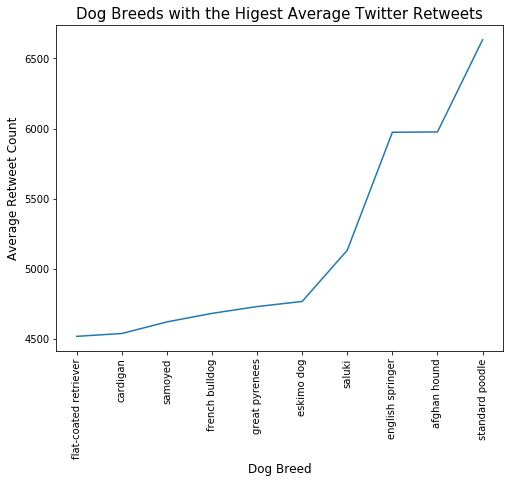

In [154]:
# dog breed with the highest mean retweet count
df_fav_breed = df_merge.groupby('dog_breed').mean()['retweet_count'].sort_values()
df_fav_breed[-10:].plot(kind='line', figsize=(8,6))
plt.xticks(np.arange(10), df_fav_breed[-10:].index, rotation=90)
plt.ylabel('Average Retweet Count', fontsize=12)
plt.xlabel('Dog Breed', fontsize=12)
plt.title('Dog Breeds with the Higest Average Twitter Retweets', fontsize=15);

In [155]:
df_fav_breed[-10:][::-1]

dog_breed
standard poodle          6631.857143
afghan hound             5976.000000
english springer         5973.555556
saluki                   5133.750000
eskimo dog               4768.888889
great pyrenees           4732.285714
french bulldog           4683.923077
samoyed                  4623.050000
cardigan                 4540.588235
flat-coated retriever    4520.250000
Name: retweet_count, dtype: float64

### Insights:
1. Most of the tweets are from iPhones.

2. The most popular dog names are `Cooper, Charlie, Oliver, Tucker, Lucy, Daisy, Penny, Sadie, Winston, and Jax.`

3. Most of the dogs are `puppers`.

4. The `saluki` dog breed has the higest average favorite count.

5. The `standard poodle` dog breed has the higest average favorite count.